In [1]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymongo
import seaborn as sns
import humanize
import warnings
import os

In [2]:
warnings.filterwarnings('ignore')

load_dotenv()

True

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80

In [4]:
# client = pymongo.MongoClient(os.getenv('MONGO_URI'))
# db = client[os.getenv('MONGO_DATABASE')]
# collection = db['scrapy_bogota_apartments_processed']

# apartments = pd.DataFrame(list(collection.find()))
# apartments = apartments.drop(columns=['_id'], axis=1)
# apartments = apartments.loc[(apartments['tipo_operacion'] == 'VENTA') & (apartments['coords_modified'] == False)]

# apartments.head(3)

In [5]:
apartments = pd.read_csv('../data/processed/apartments.csv')
print(apartments.shape)
apartments = apartments.loc[(apartments['tipo_operacion'] == 'VENTA') & (apartments['coords_modified'] == False)]
apartments = apartments.drop(['precio_arriendo'], axis=1)
apartments.head()

(19551, 45)


,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,4428565,APARTAMENTO,VENTA,160000000.0,48.0,3.0,1.0,130000.0,0.0,CALANDAIMA,...,0,False,KENNEDY,SANTA MARTA,Biblioteca Tintal,1424.00,0,PARQUE VECINAL PRIMAVERA,552.84,0
1,4387264,APARTAMENTO,VENTA,129792286.0,47.0,3.0,1.0,84000.0,0.0,BOSA OCCIDENTAL,...,0,False,BOSA,S.C. SAN BERNARDINO XXII,León XIII,3930.50,0,PARQUE VECINAL URBANIZACIÓN PORTAL DEL SOL,1171.33,0
2,3807012,APARTAMENTO,VENTA,123785000.0,46.0,2.0,1.0,84000.0,0.0,CALANDAIMA,...,0,False,KENNEDY,CALANDAIMA - LOS PANTANOS,Biblioteca Tintal,1634.63,0,PARQUE VECINAL PRIMAVERA,620.41,0
3,4087814,APARTAMENTO,VENTA,119900000.0,45.0,2.0,1.0,56000.0,0.0,TINTAL SUR,...,0,False,BOSA,LA PRADERA EL VOLCAN,Portal Américas,3399.67,0,PARQUE VECINAL URBANIZACIÓN PORTAL DEL SOL,632.65,0
4,4406300,APARTAMENTO,VENTA,358000000.0,65.0,3.0,2.0,120000.0,1.0,SOSIEGO,...,0,False,SAN CRISTOBAL,EL SOSIEGO,AV. 1 Mayo,493.91,1,PARQUE METROPOLITANO DEPORTIVO PRIMERO DE MAYO,357.44,1


In [6]:
apartments.shape

(9892, 44)

In [7]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9892 entries, 0 to 10848
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codigo                   9892 non-null   object 
 1   tipo_propiedad           9892 non-null   object 
 2   tipo_operacion           9892 non-null   object 
 3   precio_venta             9892 non-null   float64
 4   area                     9891 non-null   float64
 5   habitaciones             9892 non-null   float64
 6   banos                    9892 non-null   float64
 7   administracion           9031 non-null   float64
 8   parqueaderos             9892 non-null   float64
 9   sector                   9646 non-null   object 
 10  estrato                  9891 non-null   float64
 11  antiguedad               9892 non-null   object 
 12  latitud                  9892 non-null   float64
 13  longitud                 9892 non-null   float64
 14  direccion                433

In [8]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'descripcion', 'website', 'last_view', 'datetime', 'url', 'timeline',
       'estado', 'compañia', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque'],
      dtype='object')

In [9]:
apartments['datetime'] = pd.to_datetime(apartments['datetime'])

In [10]:
fotmat_tick_humanize = lambda x, pos: humanize.intword(x)

# Elimindando Outliers

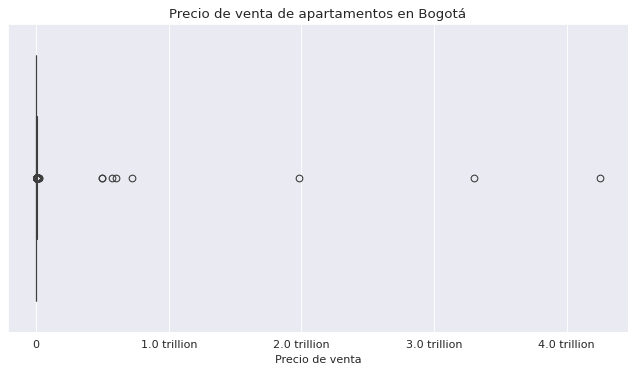

In [11]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='precio_venta', data=apartments)
plt.title('Precio de venta de apartamentos en Bogotá')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

In [12]:
Q1 = apartments['precio_venta'].quantile(0.25)
Q3 = apartments['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.8 * IQR
upper = Q3 + 1.8 * IQR

if lower < 0:
    lower = Q1 - 0.4 * IQR

outliers = apartments.loc[(apartments['precio_venta'] < lower) | (apartments['precio_venta'] > upper)]
outliers.shape
# lower, upper

(527, 44)

In [13]:
apartments = apartments[(apartments['precio_venta'] > lower) & (apartments['precio_venta'] < upper)]
apartments.shape

(9363, 44)

# Analisis Univariado

In [14]:
# selecionar todos los meses de datetime
apartments['month'] = apartments['datetime'].dt.month

In [15]:
apartments['month_name'] = apartments['month'].replace({1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 6:'Junio',
                                   7:'Julio', 8:'Agosto', 9:'Septiembre', 10:'Octubre', 11:'Noviembre', 12:'Diciembre'})

In [16]:
apartments['month_name'].value_counts()

month_name
Septiembre    9363
Name: count, dtype: int64

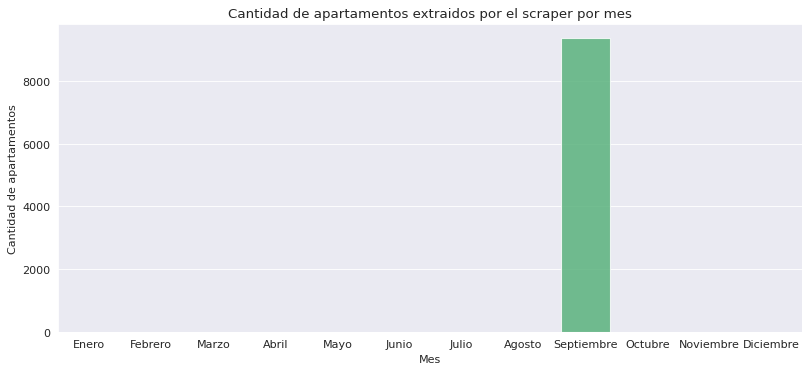

In [17]:
plt.figure(figsize=(12, 5))

sns.countplot(
    x='month_name', 
    data=apartments,
    palette='viridis',
    alpha=.8,
    # ordenar por el mes
    order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
)

plt.title('Cantidad de apartamentos extraidos por el scraper por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de apartamentos')
plt.savefig('../visualizations/apartments_by_month.png', bbox_inches='tight')
plt.show()

In [18]:
apartments['localidad'].value_counts()

localidad
USAQUEN               3415
CHAPINERO             2587
SUBA                  1668
FONTIBON               372
KENNEDY                309
TEUSAQUILLO            224
ENGATIVA               207
BOSA                   126
SANTA FE                96
LOS MARTIRES            75
BARRIOS UNIDOS          52
CIUDAD BOLIVAR          50
PUENTE ARANDA           39
RAFAEL URIBE URIBE      38
USME                    29
SAN CRISTOBAL           27
CANDELARIA              26
TUNJUELITO              12
ANTONIO NARINO          11
Name: count, dtype: int64

## Precio de Venta

In [19]:
apartments['precio_venta'].describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,"9,363.0","994,664,258.7793442","723,299,273.455876","92,000,000.0","440,000,000.0","780,000,000.0","1,370,000,000.0","3,373,800,000.0"


In [20]:
apartments['precio_venta'].describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,9.4 thousand,994.7 million,723.3 million,92.0 million,440.0 million,780.0 million,1.4 billion,3.4 billion


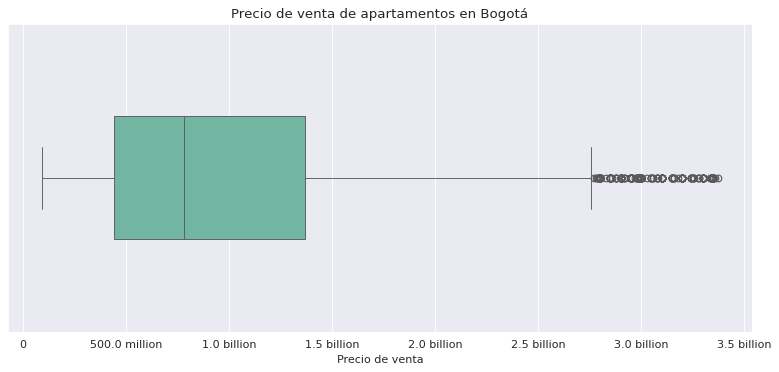

In [21]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=apartments,
    x='precio_venta',
    width=.4,
    palette='Set2',
    linewidth=.8,
)

plt.title('Precio de venta de apartamentos en Bogotá')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xlabel('Precio de venta')
plt.show()

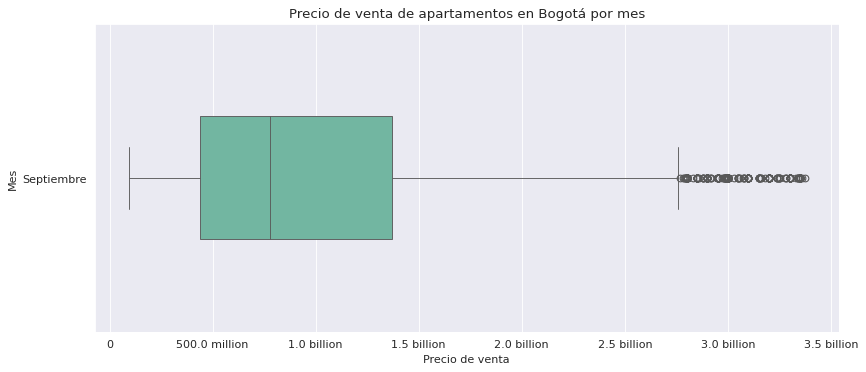

In [22]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=apartments,
    x='precio_venta',
    y='month_name',
    width=.4,
    palette='Set2',
    linewidth=.8,
)

plt.title('Precio de venta de apartamentos en Bogotá por mes')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xlabel('Precio de venta')
plt.ylabel('Mes')
plt.show()

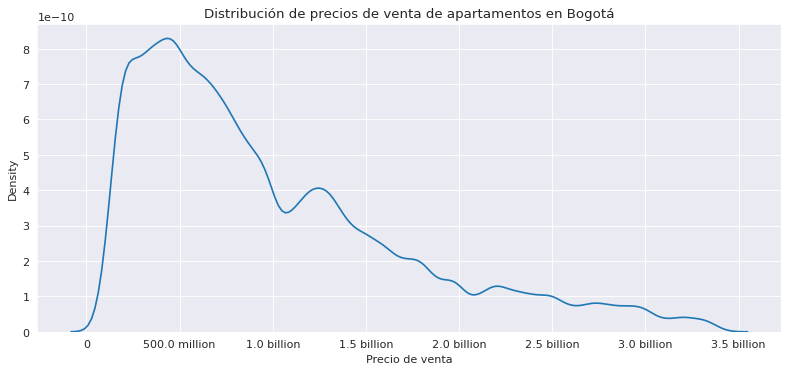

In [23]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    data=apartments,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

In [24]:
stat, p = stats.normaltest(apartments['precio_venta'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1407.067, p=0.000


In [25]:
alpha = 0.05
if p > alpha:
    print('La muestra parece Gaussiana (no rechazar H0)')
else:
    print('La muestra no parece Gaussiana (rechazar H0)')

La muestra no parece Gaussiana (rechazar H0)


In [26]:
apartments['is_cerca_estacion_tm'].value_counts()

is_cerca_estacion_tm
0    7495
1    1868
Name: count, dtype: int64

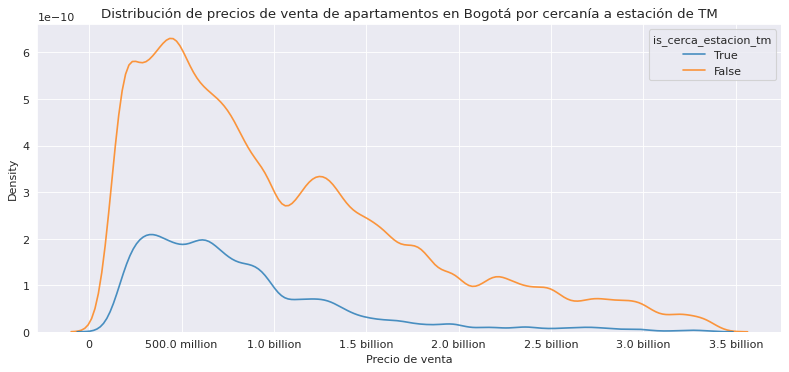

In [27]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    data=apartments,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    bw_adjust=.5,
    hue_order=[True, False],
    alpha=.8,
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.savefig('../visualizations/prices_by_estacion_tm.png', bbox_inches='tight')
plt.show()

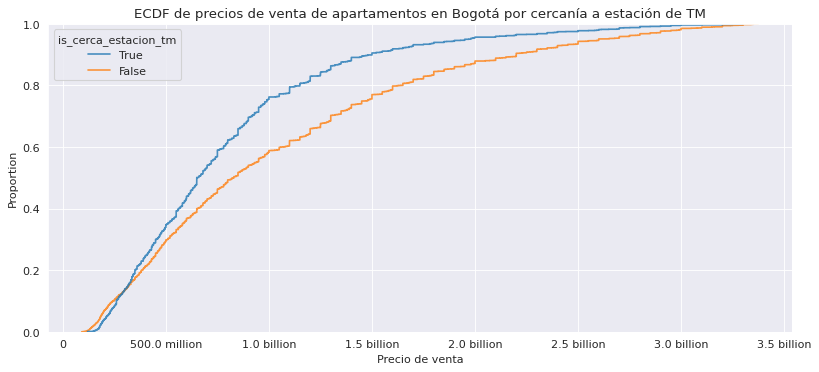

In [28]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    apartments,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    alpha=.8,
)

plt.title('ECDF de precios de venta de apartamentos en Bogotá por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.savefig('../visualizations/ecdf_prices_by_estacion_tm.png', bbox_inches='tight')
plt.show()

In [29]:
# stats de precio por cada mes
stats_month = apartments.groupby('month_name')['precio_venta'].describe()
stats_month

,count,mean,std,min,25%,50%,75%,max
month_name,,,,,,,,
Septiembre,9363.0,9.946643e+08,7.232993e+08,92000000.0,440000000.0,780000000.0,1.370000e+09,3.373800e+09


In [30]:
# stats de precio por cada mes en formato humano
stats_month_human_amigable = apartments.groupby('month_name')['precio_venta'].describe().apply(lambda x: humanize.intword(x)).T
stats_month_human_amigable

count     9.4 thousand
mean     994.7 million
std      723.3 million
min       92.0 million
25%      440.0 million
50%      780.0 million
75%        1.4 billion
max        3.4 billion
dtype: object

In [31]:
# stats de precio por localidad

stats_localidad = apartments.groupby('localidad')['precio_venta'].describe()
stats_localidad.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
localidad,,,,,,,,
CHAPINERO,2587.0,1.531524e+09,7.612336e+08,155000000.0,922500000.0,1.400000e+09,2.100000e+09,3.373800e+09
USAQUEN,3415.0,1.006420e+09,6.234805e+08,148700000.0,540000000.0,8.500000e+08,1.300000e+09,3.339000e+09
SUBA,1668.0,7.337000e+08,5.093010e+08,98000000.0,375000000.0,6.188000e+08,9.110020e+08,3.300000e+09
TEUSAQUILLO,224.0,6.545903e+08,3.728134e+08,174291000.0,423750000.0,5.645000e+08,7.800000e+08,2.700000e+09
FONTIBON,372.0,5.624163e+08,4.934280e+08,126380000.0,263225000.0,4.200000e+08,6.500000e+08,3.300000e+09
BARRIOS UNIDOS,52.0,4.810159e+08,1.524778e+08,195000000.0,390000000.0,4.545000e+08,6.041941e+08,8.600000e+08
SANTA FE,96.0,4.674250e+08,2.356313e+08,120000000.0,287500000.0,4.150000e+08,6.550000e+08,1.250000e+09
CANDELARIA,26.0,4.415437e+08,2.687055e+08,173000000.0,320000000.0,3.731752e+08,4.476964e+08,1.500000e+09
PUENTE ARANDA,39.0,4.085087e+08,4.004551e+08,165000000.0,232750000.0,2.861980e+08,3.600000e+08,2.328144e+09


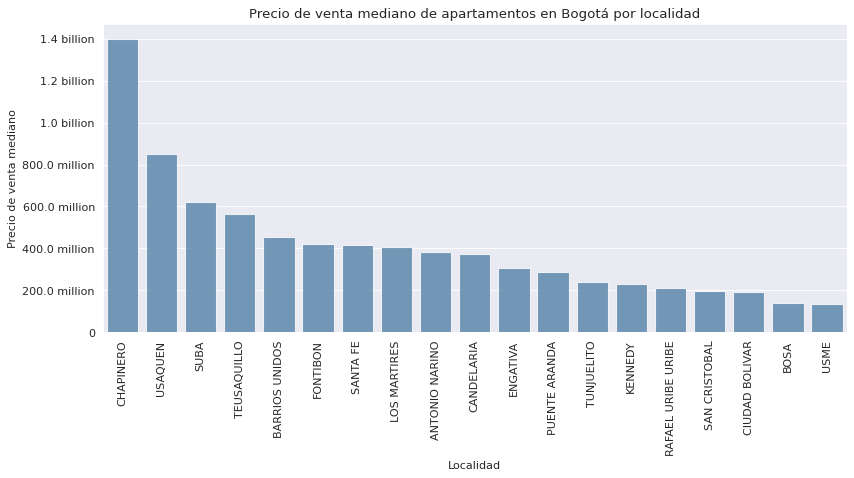

In [32]:
plt.figure(figsize=(12, 5))

sns.barplot(
    x=stats_localidad.index,
    y=stats_localidad['50%'],
    alpha=.8,
    order=stats_localidad.sort_values(by='50%', ascending=False).index,
    color='steelblue',
)

plt.title('Precio de venta mediano de apartamentos en Bogotá por localidad')
plt.xlabel('Localidad')
plt.ylabel('Precio de venta mediano')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xticks(rotation=90)
plt.show()

In [33]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'descripcion', 'website', 'last_view', 'datetime', 'url', 'timeline',
       'estado', 'compañia', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque', 'month', 'month_name'],
      dtype='object')

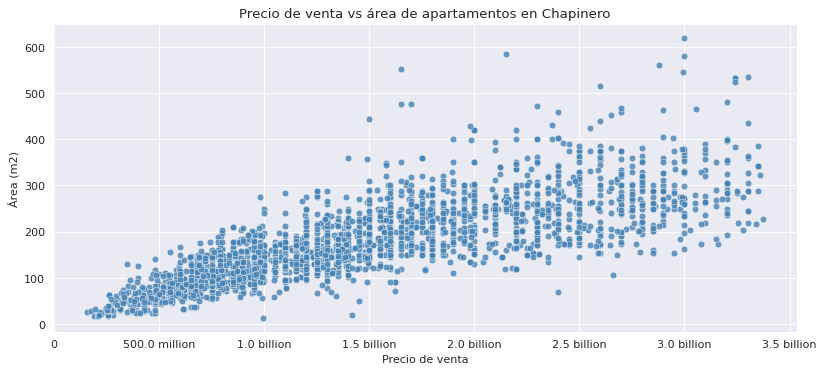

In [34]:
plt.figure(figsize=(12, 5))

sns.scatterplot(
    data=apartments.loc[apartments['localidad'] == 'CHAPINERO'],
    x='precio_venta',
    y=apartments['area'].loc[(apartments['localidad'] == 'CHAPINERO') & (apartments['area'] < 800) & (apartments['area'] > 0)],
    alpha=.8,
    color='steelblue',
)

plt.title('Precio de venta vs área de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.ylabel('Área (m2)')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

In [35]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'descripcion', 'website', 'last_view', 'datetime', 'url', 'timeline',
       'estado', 'compañia', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque', 'month', 'month_name'],
      dtype='object')

In [36]:
apartments['is_cerca_parque'].value_counts()

is_cerca_parque
0    6932
1    2431
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribución de precios de venta de apartamentos en Bogotá por cercanía a parque')

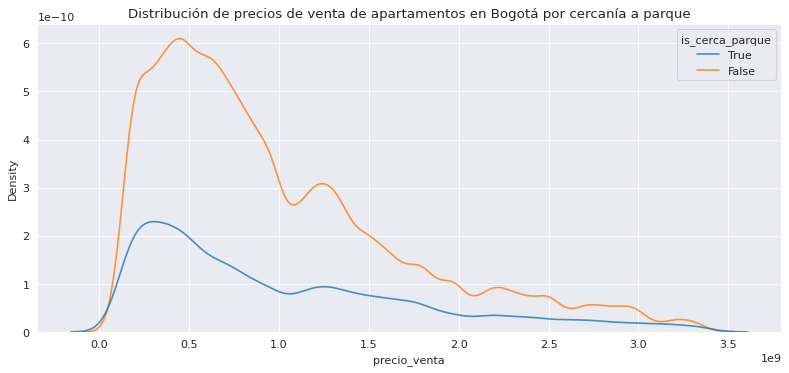

In [37]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    data=apartments,
    x='precio_venta',
    hue='is_cerca_parque',
    bw_adjust=.5,
    hue_order=[True, False],
    alpha=.8,
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá por cercanía a parque')


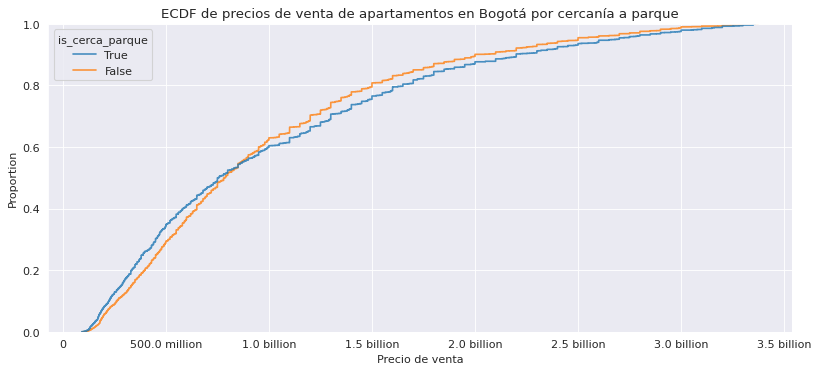

In [38]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    apartments,
    x='precio_venta',
    hue='is_cerca_parque',
    hue_order=[True, False],
    alpha=.8,
)

plt.title('ECDF de precios de venta de apartamentos en Bogotá por cercanía a parque')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.savefig('../visualizations/ecdf_prices_by_parque.png', bbox_inches='tight')
plt.show()

In [39]:
apartments['last_view'] = pd.to_datetime(apartments['last_view'])

apartments['last_view'].dt.month.value_counts()

last_view
9    9363
Name: count, dtype: int64

In [40]:
apartments.website.value_counts()

website
metrocuadrado.com    8930
habi.co               433
Name: count, dtype: int64

In [41]:
# Revisar los valores unicos de la columna 'tipo_de_operacison'
set(apartments['tipo_operacion'])

{'VENTA'}